In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("results.csv", index_col="test")

In [27]:
df

,greedy,beam,manual,mcts
test,,,,
bilateral_grid,0.009270,0.009218,0.011234,0.009223
local_laplacian,0.091627,0.096943,0.060878,0.099053
nl_means,0.137146,0.138931,0.101992,0.136551
lens_blur,0.020816,0.020542,0.005877,0.021197
camera_pipe,0.000000,0.000000,0.000000,0.000000
stencil_chain,0.019827,0.019624,0.017881,0.019635
harris,0.002945,0.002866,0.002030,0.003066
hist,0.005708,0.005624,0.001680,0.006278
max_filter,0.072901,0.082563,0.071793,0.063632


In [28]:
df_scaled = df.copy()

cols = ['greedy', 'beam', 'manual', 'mcts']
for col in cols:
    df_scaled[col] /= df['manual']
    df_scaled[col] = 1 / df_scaled[col]

Text(0, 0.5, 'Normalized speedup')

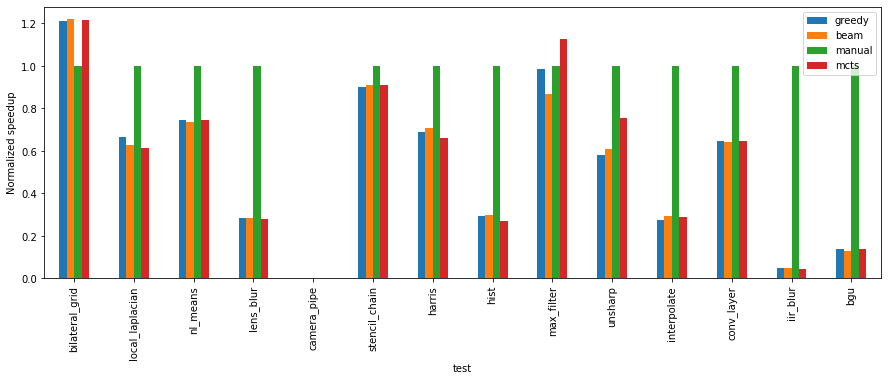

In [30]:
df_scaled.plot(kind='bar', figsize=(15,5))
plt.ylabel("Normalized speedup")

# "standalone_autoscheduler" branch

In [41]:
df_scaled = df.copy()

cols = ['master', 'greedy', 'beam', 'manual']
for col in cols:
    df_scaled[col] /= df['master']
    df_scaled[col] = 1 / df_scaled[col]

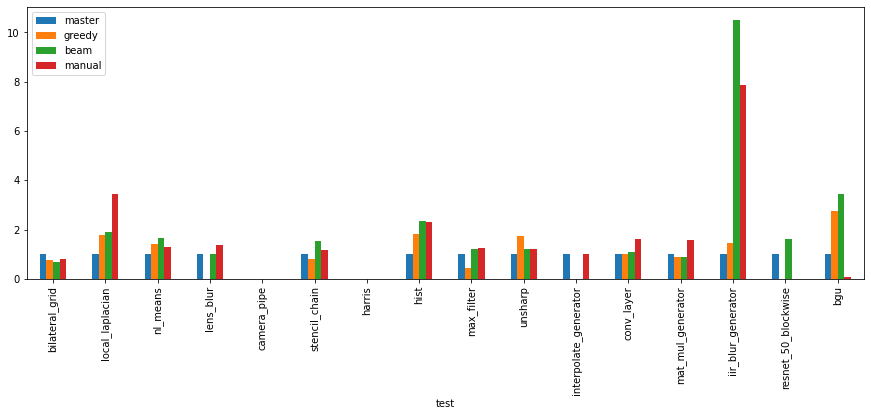

In [42]:
df_scaled.plot(kind='bar', figsize=(15,5))

* Bilateral grid: Does not match. Greedy should do better than master, and beam should be better than greedy. Manual should be slowest.
* Local laplacion: Does not match.